# CS5228 Project - Team not found
## Tree Based Models

In [77]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import category_encoders as ce
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from geopy.distance import geodesic
import geopy

from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [2]:
# load pre-processed data
train_df = pd.read_csv('./data/full-train.csv', index_col=0)
test_df = pd.read_csv('./data/full-test.csv', index_col=0)
train_df

,type,bedrooms,bathrooms,district,planning_area,lat,lng,freehold,since_built_year,no_of_units,...,price,model_0,model_1,model_2,model_3,region_0,region_1,region_2,region_3,region_4
0,1,0.410302,1.493466,1.679353,1.623338,0.000000,0.504903,0,-0.452199,-0.751503,...,5390000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0.410302,0.624249,-0.111457,-0.297220,0.369401,0.539009,1,-0.051081,-1.054097,...,2310000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,1.317486,0.624249,-0.111457,-0.297220,0.351540,0.529769,1,-0.485626,-0.551361,...,5279500.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.410302,-0.244968,-0.939067,-0.806896,0.414697,0.749020,1,2.255354,-0.546596,...,1843600.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0.410302,0.624249,0.042179,-0.806896,0.321693,0.768894,1,-0.619332,-1.025505,...,2262700.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,1,0.410302,0.624249,-0.735742,-0.483629,0.320402,0.596331,0,-0.318493,0.318300,...,2750000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26044,1,0.410302,0.624249,1.090614,0.959440,0.354335,0.460952,1,2.255354,-1.070775,...,6449300.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26045,1,-0.496883,-0.244968,-0.958805,-0.873456,0.469677,0.918986,0,-0.552479,-0.394108,...,1306800.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26046,1,1.317486,0.624249,-0.952210,-0.912355,0.443210,0.165124,0,-0.619332,0.647103,...,2420000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
# x y split
X_train = train_df.drop(columns = ['price'])
y_train = train_df['price']

In [4]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

### Decision Tree 
### all 22 features

In [5]:
dt = DecisionTreeRegressor(random_state=100)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
all_r2_scores = cross_val_score(dt, X_train, y_train, scoring='r2', cv=folds)
all_rmse = cross_val_score(dt, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)

In [6]:
all_r2_scores

array([0.95902686, 0.96830768, 0.96784806, 0.95822424, 0.90020321])

In [7]:
dt.fit(X_train, y_train)
dt.feature_importances_

array([2.20781205e-04, 1.83311990e-03, 3.27788752e-03, 1.72684323e-02,
       5.71129524e-02, 1.51113318e-02, 2.95385639e-02, 5.00096917e-04,
       8.89133452e-03, 1.24365927e-02, 8.50586641e-01, 1.85640172e-03,
       2.17991981e-04, 1.15571532e-04, 9.50185505e-04, 7.60121812e-06,
       2.75605721e-06, 5.33172033e-05, 2.13358214e-06, 5.54779057e-06,
       6.44154864e-06, 4.31742051e-06])

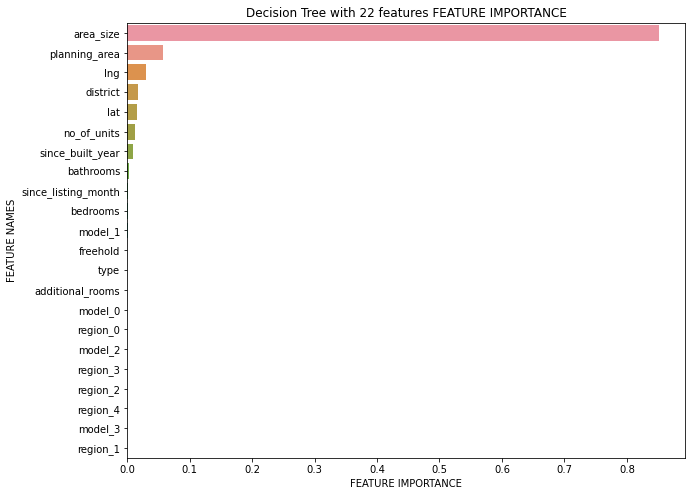

In [8]:
plot_feature_importance(dt.feature_importances_,X_train.columns,'Decision Tree with 22 features')
#plt.savefig('Linear Regression with 22 features (zoomed out).jpeg')

In [9]:
reduced_X_train = X_train

### Auxiliary Data
#### Without MRT centrality

In [10]:
num_of_amenties = pd.read_csv('./data/auxiliary-number-amenties.csv', index_col=0)
closest_distance = pd.read_csv('./data/auxiliary-distance-amenties.csv', index_col=0)

In [11]:
# fit transform data
num_scaler = StandardScaler()
num_of_amenties[num_of_amenties.columns] = num_scaler.fit_transform(num_of_amenties) 
dis_scaler = StandardScaler()
closest_distance[closest_distance.columns] = dis_scaler.fit_transform(closest_distance) 

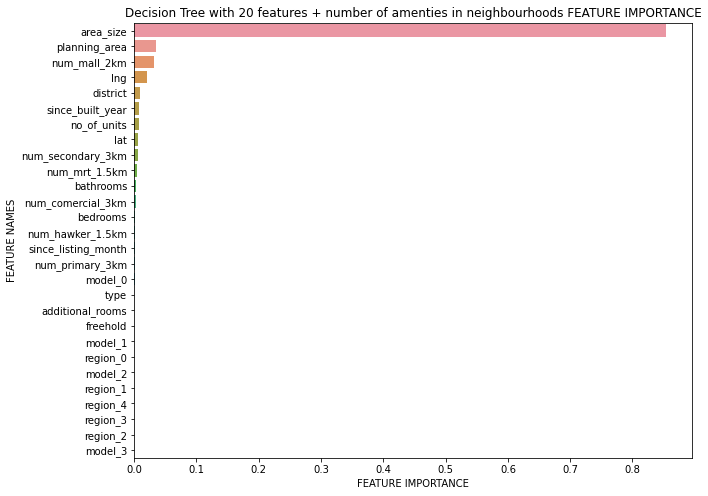

In [12]:
# number of amenties in a given radius
x_train_red_num_amenties = reduced_X_train.join(num_of_amenties)
dt = DecisionTreeRegressor(random_state=100)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
num_r2_scores = cross_val_score(dt, x_train_red_num_amenties, y_train, scoring='r2', cv=folds)
num_rmse = cross_val_score(dt, x_train_red_num_amenties, y_train, scoring='neg_root_mean_squared_error', cv=folds)

dt.fit(x_train_red_num_amenties, y_train)
plot_feature_importance(dt.feature_importances_,x_train_red_num_amenties.columns,'Decision Tree with 20 features + number of amenties in neighbourhoods')
# plt.savefig('Linear Regression with 18 features with num amenties.jpeg')

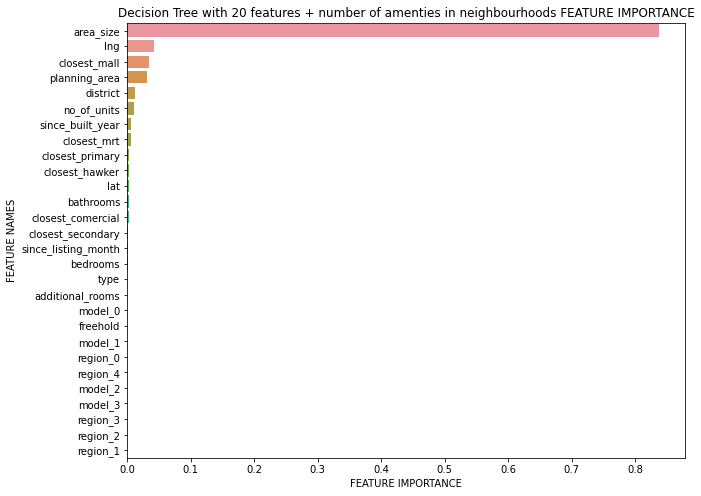

In [13]:
# closest amenties
x_train_red_distance = reduced_X_train.join(closest_distance)
dt = DecisionTreeRegressor(random_state=100)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
dist_r2_scores = cross_val_score(dt, x_train_red_distance, y_train, scoring='r2', cv=folds)
dist_rmse = cross_val_score(dt, x_train_red_distance, y_train, scoring='neg_root_mean_squared_error', cv=folds)

dt.fit(x_train_red_distance, y_train)
plot_feature_importance(dt.feature_importances_,x_train_red_distance.columns,'Decision Tree with 20 features + number of amenties in neighbourhoods')
# plt.savefig('Linear Regression with 18 features with num amenties.jpeg')

#### With MRT centrality - closeness

In [14]:
# load data
weighted_num = pd.read_csv('./data/auxiliary-mrt-num-weighted.csv', index_col=0)
weighted_distance = pd.read_csv('./data/auxiliary-mrt-distance-weighted.csv', index_col=0)

In [15]:
weighted_num

,closeness_num_mrt_1.5km,betweenness_num_mrt_1.5km,num_comercial_3km,num_hawker_1.5km,num_primary_3km,num_secondary_3km,num_mall_2km,num_mrt_1.5km
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.565896,0.505815,3.0,4.0,17.0,10.0,12.0,5.0
2,0.456412,0.474675,3.0,5.0,16.0,7.0,35.0,4.0
3,0.447603,0.382574,1.0,2.0,17.0,9.0,2.0,5.0
4,0.178316,0.115548,1.0,4.0,12.0,10.0,8.0,2.0
...,...,...,...,...,...,...,...,...
26043,0.921843,0.538157,3.0,7.0,13.0,6.0,18.0,9.0
26044,0.348310,0.600896,1.0,0.0,13.0,11.0,15.0,3.0
26045,0.188850,0.057243,3.0,1.0,19.0,17.0,7.0,3.0
26046,0.165575,0.253552,2.0,1.0,13.0,12.0,5.0,2.0


In [16]:
# closeness weighted num
weighted_closeness_num_amenties = weighted_num.drop(columns = ['betweenness_num_mrt_1.5km', 'num_mrt_1.5km'])

num_scaler = StandardScaler()
weighted_closeness_num_amenties[weighted_closeness_num_amenties.columns] = num_scaler.fit_transform(weighted_closeness_num_amenties) 

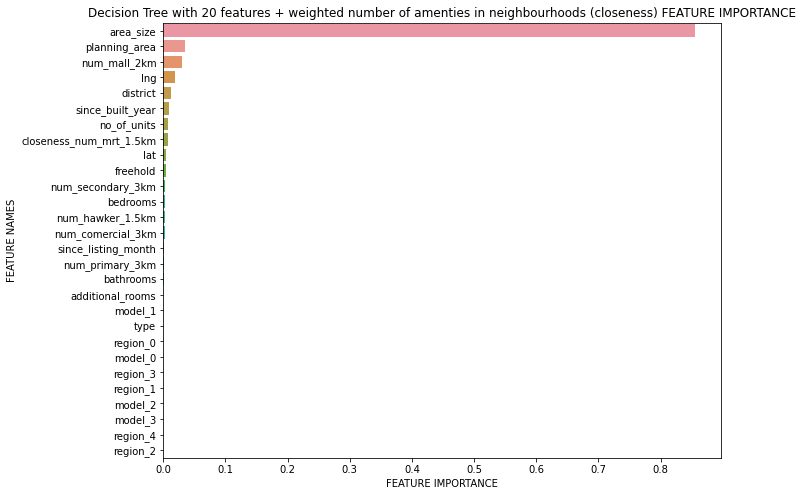

In [17]:
# number of amenties in a given radius with centrality weight (closeness)
x_train_red_num_amenties_closeness = reduced_X_train.join(weighted_closeness_num_amenties)
dt = DecisionTreeRegressor(random_state=100)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
num_r2_scores_closeness = cross_val_score(dt, x_train_red_num_amenties_closeness, y_train, scoring='r2', cv=folds)
num_rmse_closeness = cross_val_score(dt, x_train_red_num_amenties_closeness, y_train, scoring='neg_root_mean_squared_error', cv=folds)

dt.fit(x_train_red_num_amenties_closeness, y_train)
plot_feature_importance(dt.feature_importances_,x_train_red_num_amenties_closeness.columns,'Decision Tree with 20 features + weighted number of amenties in neighbourhoods (closeness)')

In [18]:
# closeness weighted nearest distance
weighted_closeness_distance = weighted_distance.drop(columns = ['betweenness_closest_mrt', 'closest_mrt'])

num_scaler = StandardScaler()
weighted_closeness_distance[weighted_closeness_distance.columns] = num_scaler.fit_transform(weighted_closeness_distance) 

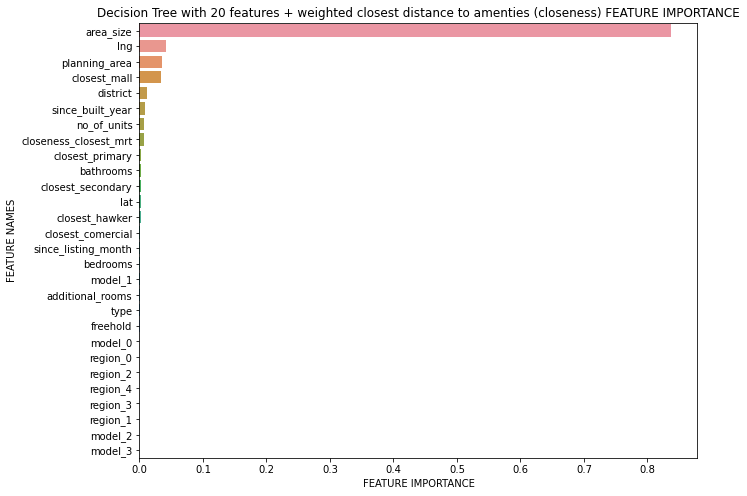

In [19]:
# number of amenties in a given radius with centrality weight (closeness)
x_train_red_distance_closeness = reduced_X_train.join(weighted_closeness_distance)
dt = DecisionTreeRegressor(random_state=100)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
dist_r2_scores_closeness = cross_val_score(dt, x_train_red_distance_closeness, y_train, scoring='r2', cv=folds)
dist_rmse_closeness = cross_val_score(dt, x_train_red_distance_closeness, y_train, scoring='neg_root_mean_squared_error', cv=folds)

dt.fit(x_train_red_distance_closeness, y_train)
plot_feature_importance(dt.feature_importances_,x_train_red_distance_closeness.columns,'Decision Tree with 20 features + weighted closest distance to amenties (closeness)')

####  With MRT centrality - betweenness

In [20]:
# betweenness weighted num of amenties
weighted_betweenness_num_amenties = weighted_num.drop(columns = ['closeness_num_mrt_1.5km', 'num_mrt_1.5km'])

num_scaler = StandardScaler()
weighted_betweenness_num_amenties[weighted_betweenness_num_amenties.columns] = num_scaler.fit_transform(weighted_betweenness_num_amenties) 

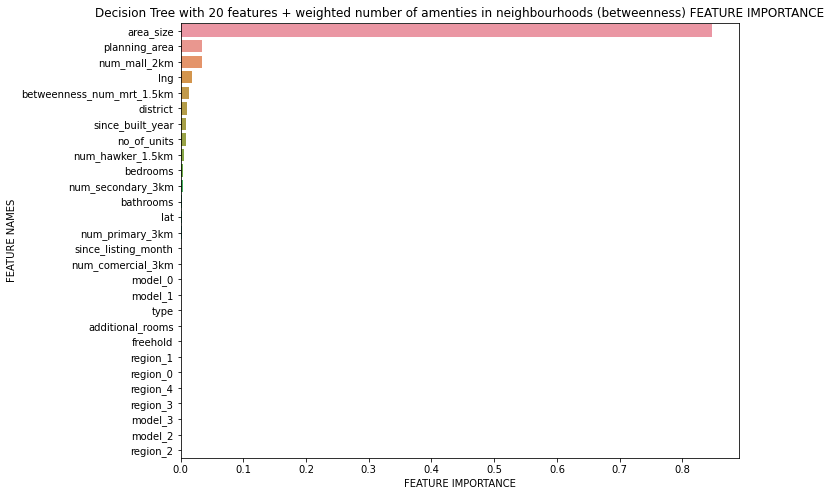

In [21]:
# number of amenties in a given radius with centrality weight (closeness)
x_train_red_num_amenties_betweenness = reduced_X_train.join(weighted_betweenness_num_amenties)
dt = DecisionTreeRegressor(random_state=100)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
num_r2_scores_betweenness = cross_val_score(dt, x_train_red_num_amenties_betweenness, y_train, scoring='r2', cv=folds)
num_rmse_betweenness = cross_val_score(dt, x_train_red_num_amenties_betweenness, y_train, scoring='neg_root_mean_squared_error', cv=folds)

dt.fit(x_train_red_num_amenties_betweenness, y_train)
plot_feature_importance(dt.feature_importances_,x_train_red_num_amenties_betweenness.columns,'Decision Tree with 20 features + weighted number of amenties in neighbourhoods (betweenness)')

In [22]:
weighted_betweenness_distance = weighted_distance.drop(columns = ['closeness_closest_mrt', 'closest_mrt'])

num_scaler = StandardScaler()
weighted_betweenness_distance[weighted_betweenness_distance.columns] = num_scaler.fit_transform(weighted_betweenness_distance) 

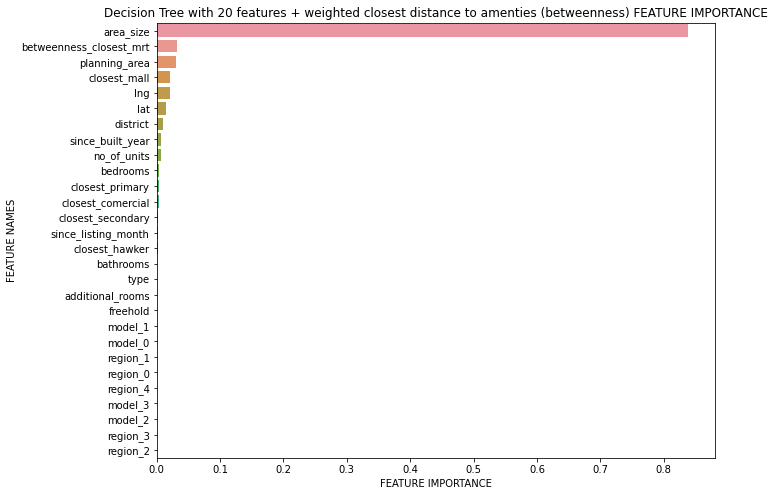

In [23]:
x_train_red_distance_betweenness = reduced_X_train.join(weighted_betweenness_distance)
dt = DecisionTreeRegressor(random_state=100)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
dist_r2_scores_betweenness = cross_val_score(dt, x_train_red_distance_betweenness, y_train, scoring='r2', cv=folds)
dist_rmse_betweenness = cross_val_score(dt, x_train_red_distance_betweenness, y_train, scoring='neg_root_mean_squared_error', cv=folds)

dt.fit(x_train_red_distance_betweenness, y_train)
plot_feature_importance(dt.feature_importances_,x_train_red_distance_betweenness.columns,'Decision Tree with 20 features + weighted closest distance to amenties (betweenness)')

## Compare Model Performance

In [25]:
r2 = []
rmse = []

r2 =  [np.mean(all_r2_scores),  np.mean(num_r2_scores),
       np.mean(num_r2_scores_closeness),np.mean(num_r2_scores_betweenness), 
       np.mean(dist_r2_scores), np.mean(dist_r2_scores_closeness), np.mean(dist_r2_scores_betweenness)]
rmse = [np.mean(all_rmse),  np.mean(num_rmse),
        np.mean(num_rmse_closeness), np.mean(num_rmse_betweenness), np.mean(dist_rmse),
       np.mean(dist_rmse_closeness), np.mean(dist_rmse_betweenness)]

In [26]:
model = ['all_original_data','reduced_w_num_amenties', 
        'reduced_w_closeness_num_amenties','reduced_w_betweenness_num_amenties',
        'reduced_w_nearest_amenties', 'reduced_w_closeness_nearest_amenties', 
        'reduced_w_betweenness_nearest_amenties']

d = {'model': model, 'R2': r2, 'RMSE': rmse}

cv_results = pd.DataFrame(data=d)

In [27]:
cv_results['RMSE']= cv_results['RMSE'] *(-1)

Text(0, 0.5, 'r2')

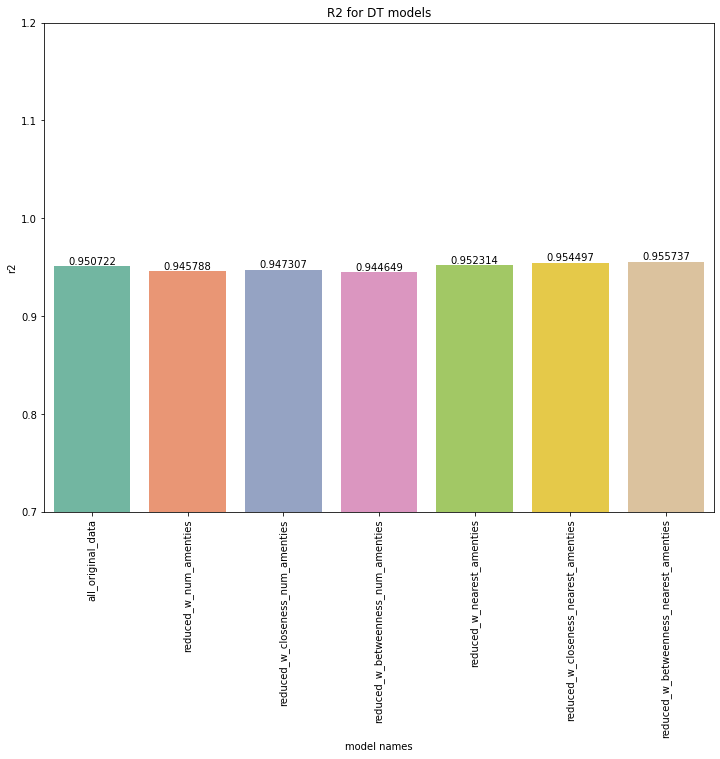

In [28]:
plt.figure(figsize=(12, 9))
ax = sns.barplot(x="model", y="R2", data=cv_results, palette="Set2")
ax.bar_label(ax.containers[0])
plt.ylim(0.7, 1.2)
_ = plt.xticks(rotation=90)
#Add chart labels
plt.title('R2 for DT models')
plt.xlabel('model names')
plt.ylabel('r2')
# plt.savefig('Decison Tree models R2.jpeg')

Text(0, 0.5, 'rmse')

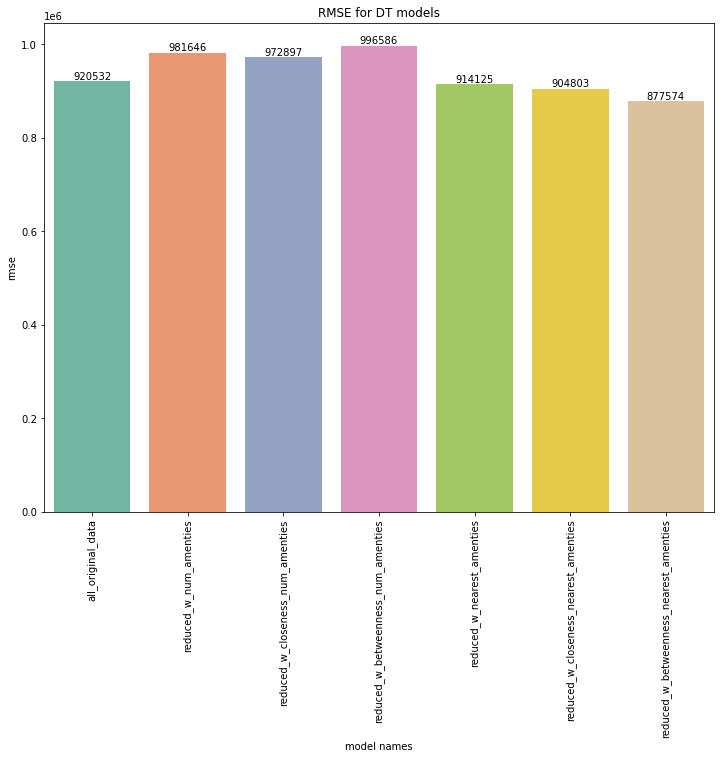

In [29]:
plt.figure(figsize=(12, 9))
ax = sns.barplot(x="model", y="RMSE", data=cv_results, palette="Set2")
ax.bar_label(ax.containers[0])
# plt.ylim(1.0*10**6, 1.2*10**6)
_ = plt.xticks(rotation=90)
#Add chart labels
plt.title('RMSE for DT models')
plt.xlabel('model names')
plt.ylabel('rmse')
# plt.savefig('Decison Tree models RMSE.jpeg')

### Hyper-parameter Tuning

In [112]:
# tune on the best decision tree model i.e. reduced with nearest amenties
param_grid = {'min_samples_split': [2, 5, 10, 20], 'max_depth': [10, 20, 50, None], 
              'max_features': ['auto', 'sqrt', 'log2',  None]}

dtr = DecisionTreeRegressor(random_state = 100)

g_search = GridSearchCV(estimator = dtr, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                        cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)

In [113]:
g_search.fit(x_train_red_distance_betweenness, y_train)

param = g_search.best_params_
print(param)

{'max_depth': 50, 'max_features': 'auto', 'min_samples_split': 10}


In [114]:
dtr =DecisionTreeRegressor()
dtr.set_params(**param)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
tuned_r2 = np.mean(cross_val_score(dtr, x_train_red_distance_betweenness, y_train, scoring='r2', cv=folds))

In [115]:
tuned_rmse =(-1) * np.mean(cross_val_score(dtr, x_train_red_distance_betweenness, y_train, scoring='neg_root_mean_squared_error', cv=folds))

In [116]:
tuned_rmse

901383.9032210415

In [117]:
tuned_r2

0.9514266992045872

## Random Forest

In [36]:
# recorder for results
rf_r2 = []
rf_rmse = []

### All 22 features

In [71]:
def train_regressor(clf, X_train, rf_r2, rf_rmse):
    rf = clf
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    r2_scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=folds)
    rmse = cross_val_score(rf, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
    rf.fit(X_train, y_train)
    rf_r2.append(np.mean(r2_scores))
    rf_rmse.append(np.mean(rmse))
    plot_feature_importance(rf.feature_importances_,X_train.columns,' ')

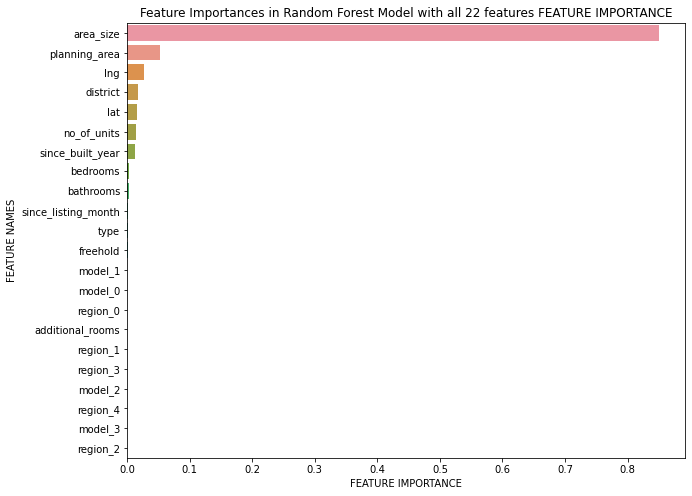

In [52]:
rf = RandomForestRegressor(random_state=100)
train_regressor(rf, X_train, rf_r2, rf_rmse)

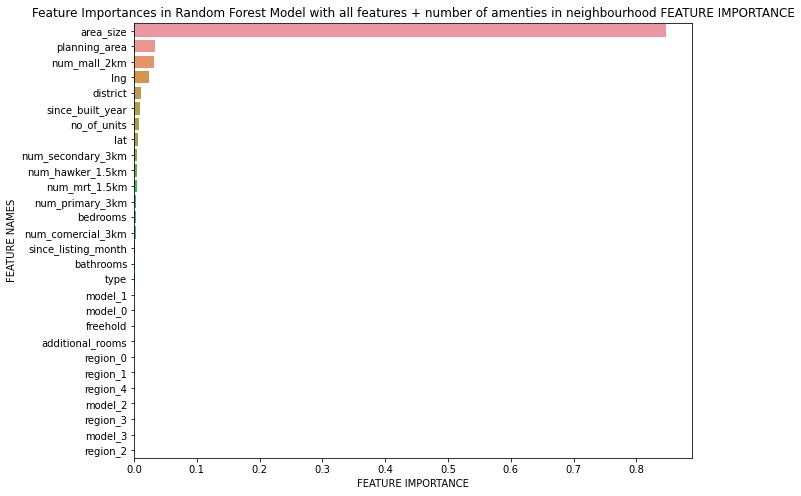

In [53]:
t_df = x_train_red_num_amenties
train_regressor(rf, t_df, rf_r2, rf_rmse)

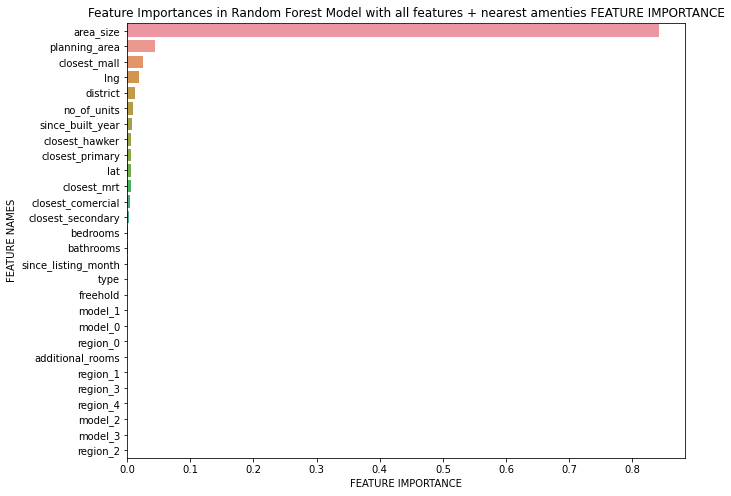

In [54]:
t_df = x_train_red_distance
train_regressor(rf, t_df, rf_r2, rf_rmse)

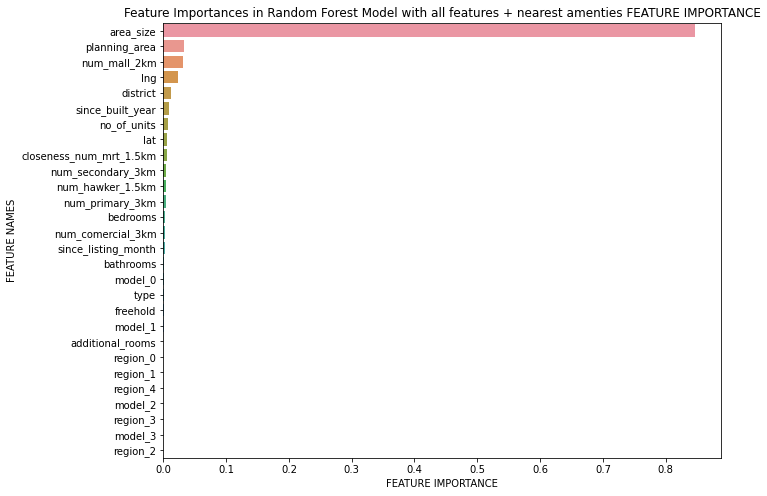

In [55]:
t_df = x_train_red_num_amenties_closeness
train_regressor(rf, t_df, rf_r2, rf_rmse)

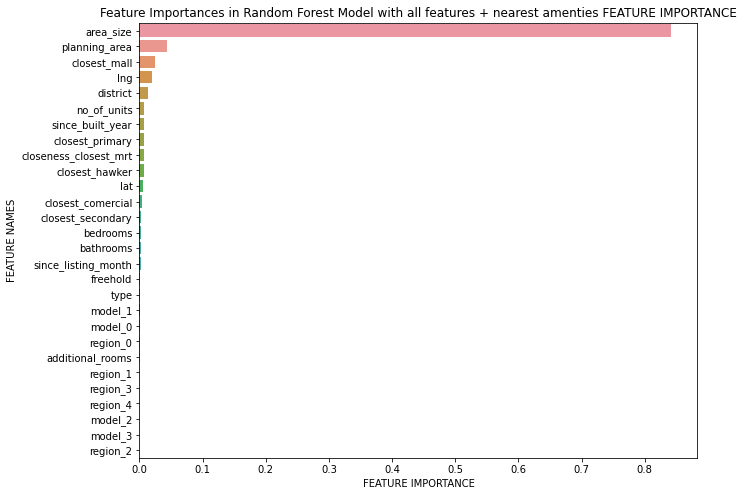

In [56]:
t_df = x_train_red_distance_closeness
train_regressor(rf, t_df, rf_r2, rf_rmse)

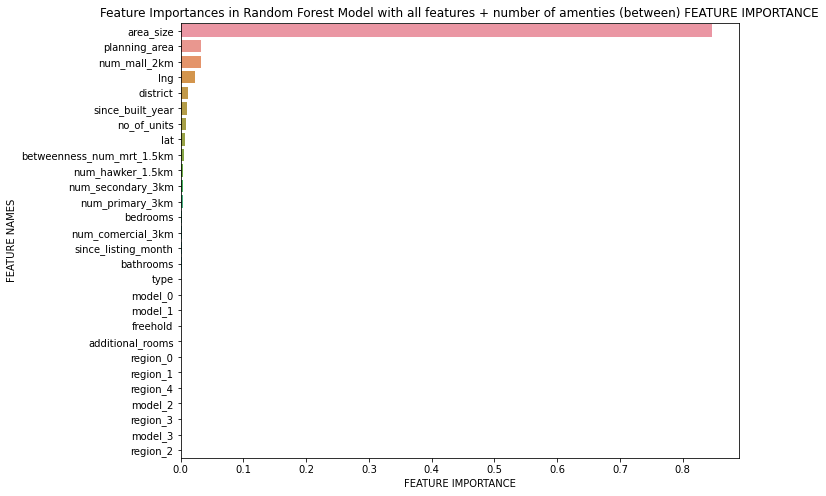

In [57]:
t_df = x_train_red_num_amenties_betweenness
train_regressor(rf, t_df, rf_r2, rf_rmse)

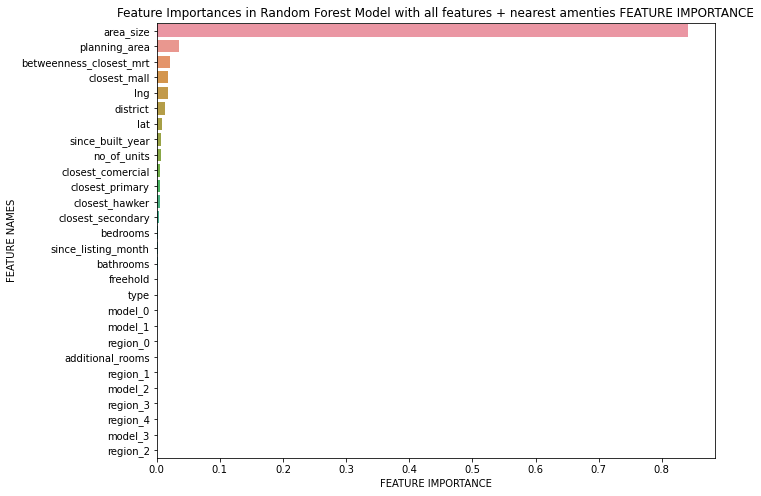

In [58]:
t_df = x_train_red_distance_betweenness
train_regressor(rf, t_df, rf_r2, rf_rmse)

In [64]:
model = ['all_original_data','reduced_w_num_amenties', 
        'reduced_w_closeness_num_amenties','reduced_w_betweenness_num_amenties',
        'reduced_w_nearest_amenties', 'reduced_w_closeness_nearest_amenties', 
        'reduced_w_betweenness_nearest_amenties']

d = {'model': model, 'R2': rf_r2, 'RMSE': rf_rmse}

cv_results = pd.DataFrame(data=d)
cv_results['RMSE']= cv_results['RMSE'] *(-1)

In [65]:
cv_results

,model,R2,RMSE
0,all_original_data,0.962070,793827.073838
1,reduced_w_num_amenties,0.963171,775340.080669
2,reduced_w_closeness_num_amenties,0.965012,754972.375416
3,reduced_w_betweenness_num_amenties,0.963420,775525.954964
4,reduced_w_nearest_amenties,0.964799,758205.232869
5,reduced_w_closeness_nearest_amenties,0.962964,783378.047022
6,reduced_w_betweenness_nearest_amenties,0.965171,748817.979237


Text(0, 0.5, 'r2')

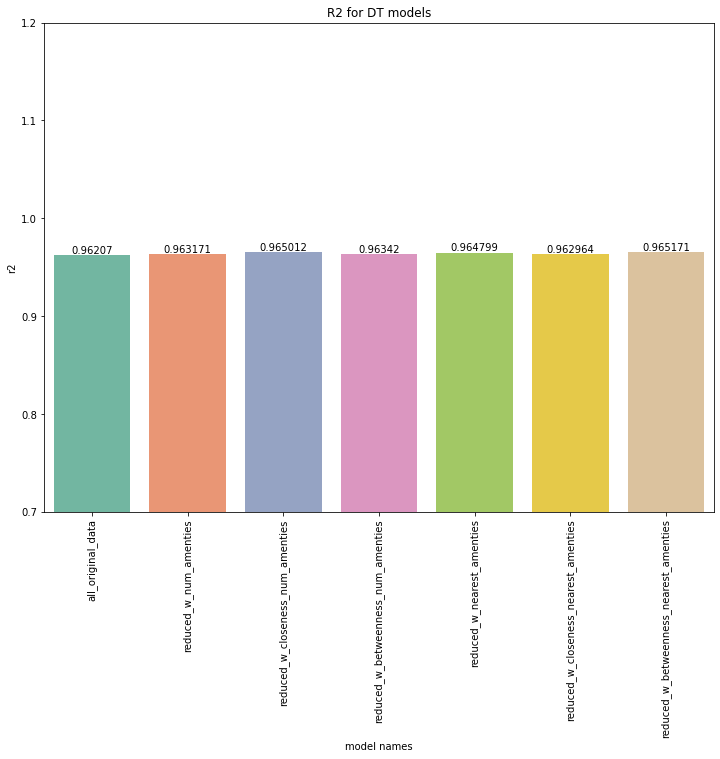

In [66]:
plt.figure(figsize=(12, 9))
ax = sns.barplot(x="model", y="R2", data=cv_results, palette="Set2")
ax.bar_label(ax.containers[0])
plt.ylim(0.7, 1.2)
_ = plt.xticks(rotation=90)
#Add chart labels
plt.title('R2 for DT models')
plt.xlabel('model names')
plt.ylabel('r2')
# plt.savefig('Decison Tree models R2.jpeg')

Text(0, 0.5, 'rmse')

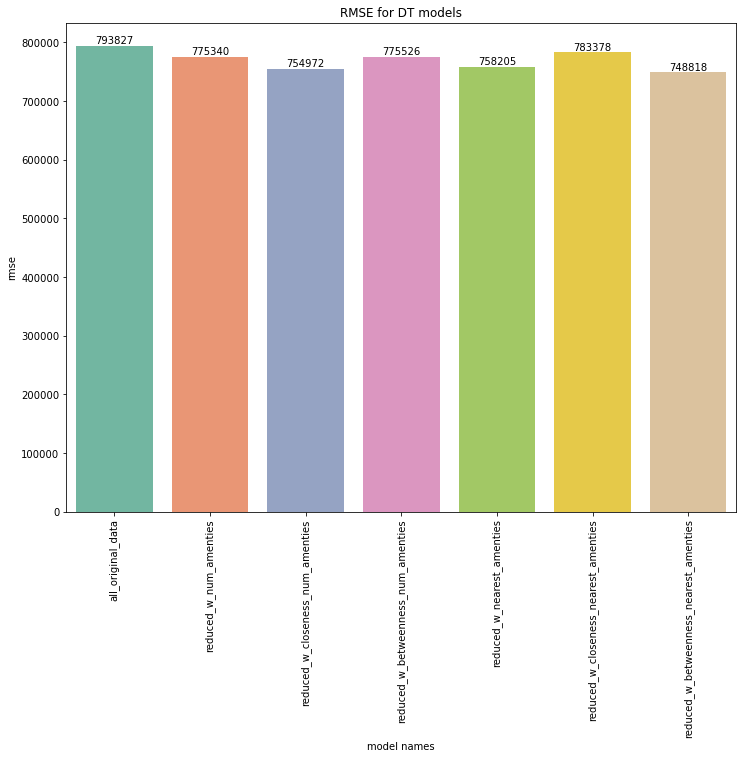

In [67]:
plt.figure(figsize=(12, 9))
ax = sns.barplot(x="model", y="RMSE", data=cv_results, palette="Set2")
ax.bar_label(ax.containers[0])
# plt.ylim(1.0*10**6, 1.2*10**6)
_ = plt.xticks(rotation=90)
#Add chart labels
plt.title('RMSE for DT models')
plt.xlabel('model names')
plt.ylabel('rmse')
# plt.savefig('Decison Tree models RMSE.jpeg')

## Hyper parameter tuning

In [103]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 50, 100, None],
    'max_features': ['auto', 'sqrt', 'log2',  None],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200, 500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(x_train_red_distance_betweenness, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=100; total time=  14.6s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100; total time=  18.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200; total time=  35.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=10, n_estimators=100; total time=  17.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=10, n_estimators=200; total time=  34.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=500; total time=  22.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=50; total time=   1.8s
[CV] EN

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=100; total time=  14.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=50; total time=   9.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100; total time=  18.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=500; total time= 1.5min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   4.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   8.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=50; total time=   1.8s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=50; total time=   1.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_spl

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 50, 100, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=2)

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=200; total time=  33.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200; total time=  36.3s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=10, n_estimators=100; total time=  17.3s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=10, n_estimators=200; total time=  35.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   9.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=50; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=500; total time=  20.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_s

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=50; total time=   6.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=500; total time= 1.6min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=2,

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=500; total time= 1.5min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=10, n_estimators=500; total time= 1.5min
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=50; total time=   1.7s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200; total time=   6.9s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=500; total time=  17.1s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_split=2, n_estimators=100; total time=  19.1s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_split=5, n_estimators=100; total time=  18.1s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_split=5, n_estimators=200; total time=  36.4s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_sp

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=50; total time=   6.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=50; total time=   7.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=50; total time=   9.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100; total time=  18.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=500; total time= 1.5min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   7.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=500; total time=  20.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_split


[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_split=10, n_estimators=100; total time=  17.4s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_split=10, n_estimators=500; total time= 1.0min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=100; total time=  14.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=50; total time=   9.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100; total time=  18.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=10, n_estimators=50; total time=   8.7s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=10, n_estimators=50; total time=   8.7s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=10, n_estimators=50; total time=   8.8s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samp

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=100; total time=  14.7s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100; total time=  18.8s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200; total time=  36.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=10, n_estimators=100; total time=  17.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_split=10, n_estimators=200; total time=  34.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   9.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=50; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_s

In [118]:
param = grid_search.best_params_
print(param)

{'bootstrap': True, 'max_depth': 50, 'max_features': None, 'min_samples_split': 5, 'n_estimators': 100}


In [119]:
rfr = RandomForestRegressor()
rfr.set_params(**param)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
tuned_r2 = np.mean(cross_val_score(rfr, x_train_red_distance_betweenness, y_train, scoring='r2', cv=folds))

In [120]:
tuned_rmse =(-1) * np.mean(cross_val_score(rfr, x_train_red_distance_betweenness, y_train, scoring='neg_root_mean_squared_error', cv=folds))

In [121]:
tuned_rmse

754702.2438815299

In [122]:
tuned_r2

0.9648694903691091

## AdaBoost

In [91]:
tdfs = [X_train, x_train_red_num_amenties, x_train_red_distance, x_train_red_num_amenties_closeness, 
        x_train_red_distance_closeness, x_train_red_num_amenties_betweenness, x_train_red_distance_betweenness]
# recorder for results
ada_r2 = []
ada_rmse = []

done
done
done
done
done
done
done


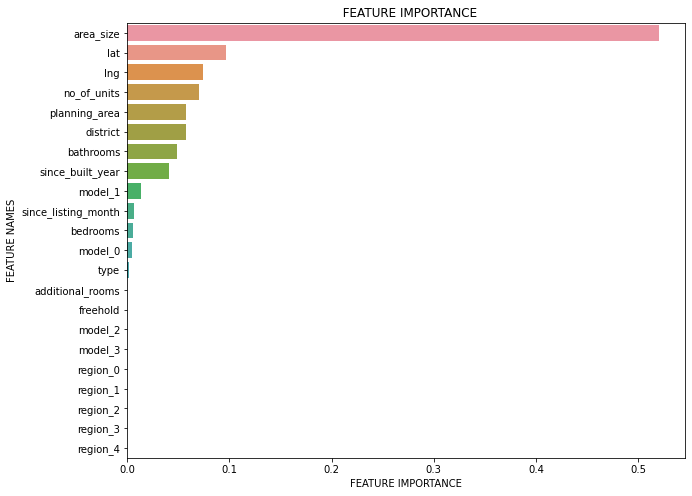

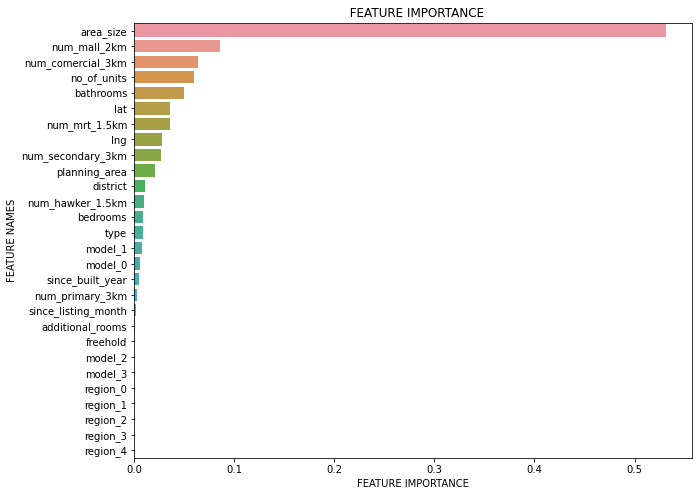

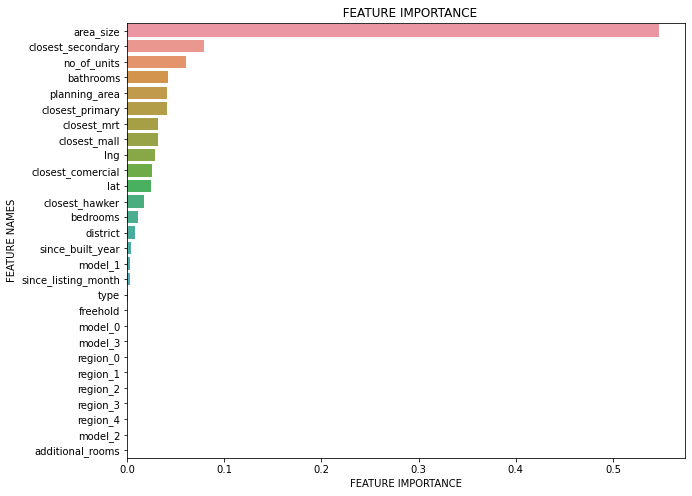

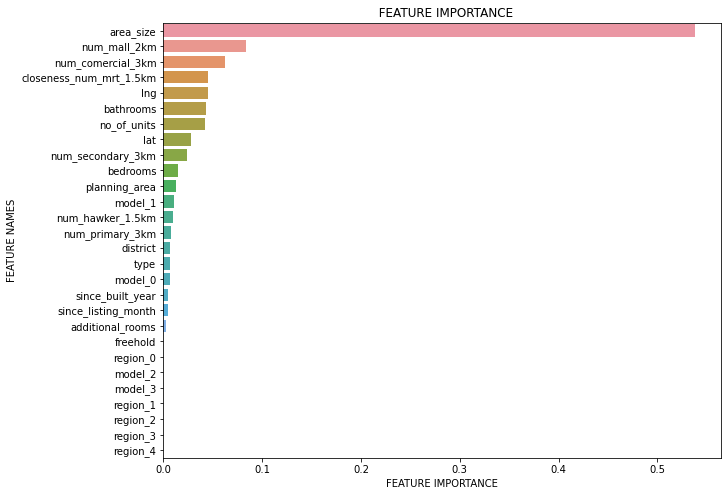

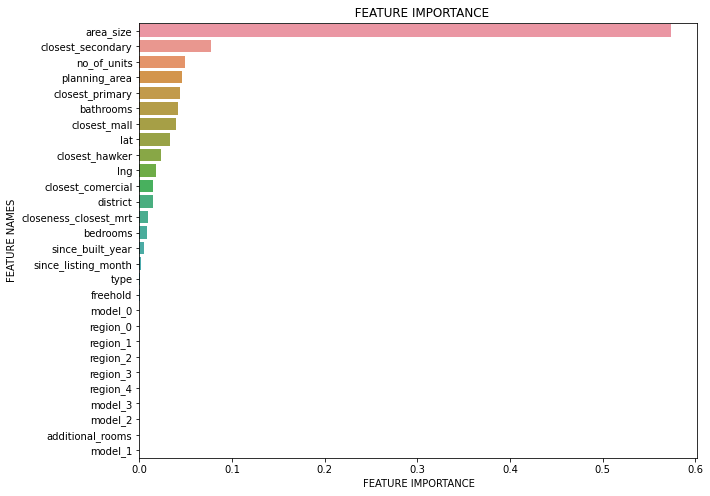

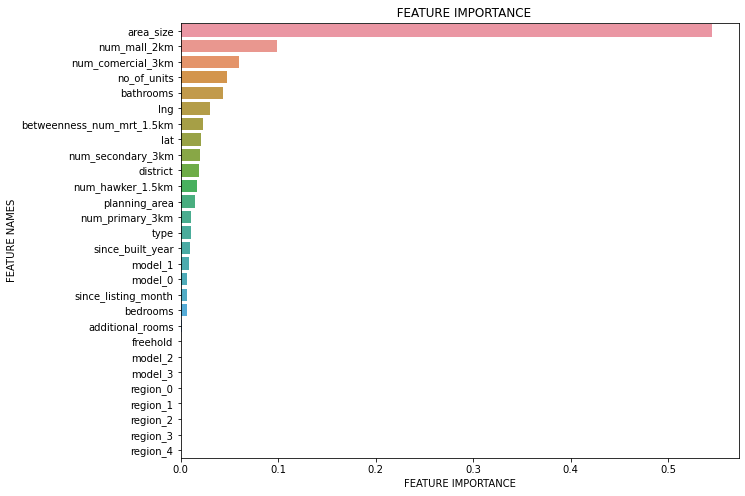

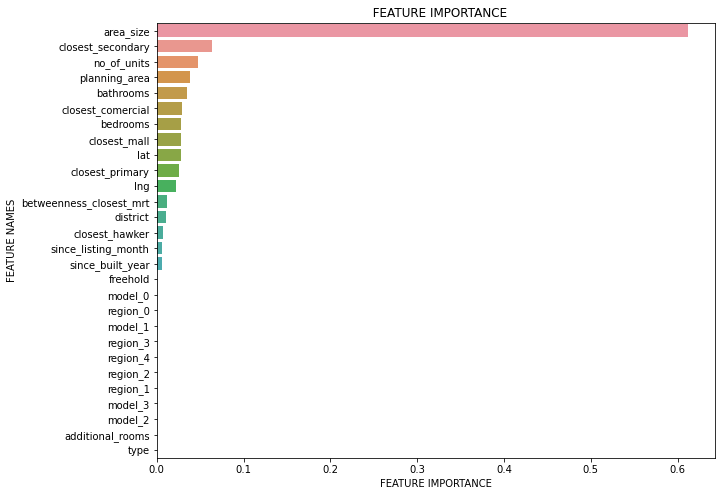

In [92]:
clf = AdaBoostRegressor(n_estimators=100, random_state=0)
for t_df in tdfs:
    train_regressor(clf, t_df, ada_r2, ada_rmse)
    print('done')

In [93]:
ada_r2

[0.5009845982726856,
 0.2622190084296233,
 0.24135037651204366,
 0.2593894933164057,
 0.20501622640643863,
 0.3570996687852275,
 0.2726762951451133]

In [94]:
ada_rmse

[-2961964.911888326,
 -3690222.3062778106,
 -3754760.502738139,
 -3687204.2455787146,
 -3834399.439749363,
 -3317317.807688349,
 -3682125.1010173997]

In [95]:
model = ['all_original_data','reduced_w_num_amenties', 
        'reduced_w_closeness_num_amenties','reduced_w_betweenness_num_amenties',
        'reduced_w_nearest_amenties', 'reduced_w_closeness_nearest_amenties', 
        'reduced_w_betweenness_nearest_amenties']

d = {'model': model, 'R2': ada_r2, 'RMSE': ada_rmse}

cv_results = pd.DataFrame(data=d)
cv_results['RMSE']= cv_results['RMSE'] *(-1)

Text(0, 0.5, 'r2')

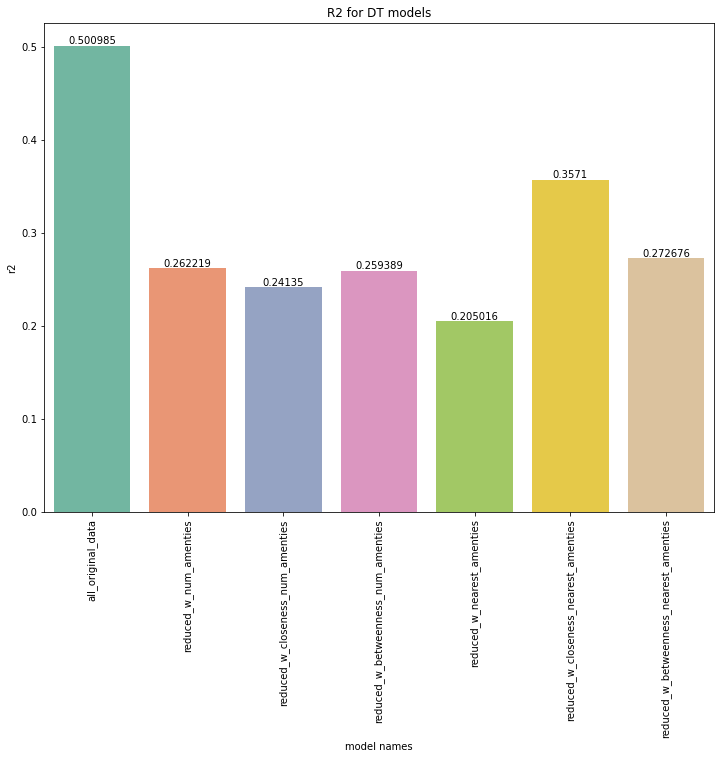

In [96]:
plt.figure(figsize=(12, 9))
ax = sns.barplot(x="model", y="R2", data=cv_results, palette="Set2")
ax.bar_label(ax.containers[0])
# plt.ylim(0.7, 1.2)
_ = plt.xticks(rotation=90)
#Add chart labels
plt.title('R2 for DT models')
plt.xlabel('model names')
plt.ylabel('r2')
# plt.savefig('Decison Tree models R2.jpeg')

Text(0, 0.5, 'rmse')

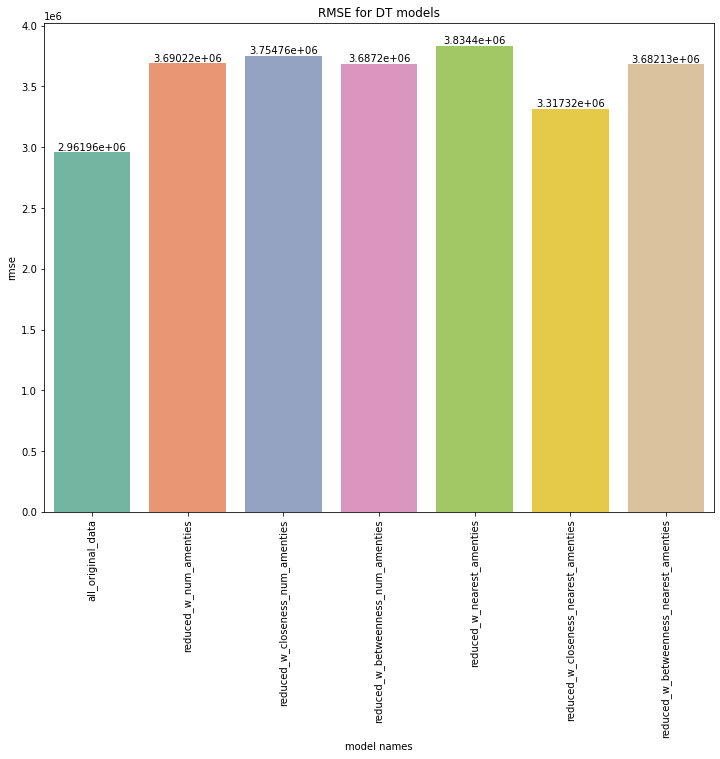

In [97]:
plt.figure(figsize=(12, 9))
ax = sns.barplot(x="model", y="RMSE", data=cv_results, palette="Set2")
ax.bar_label(ax.containers[0])
# plt.ylim(1.0*10**6, 1.2*10**6)
_ = plt.xticks(rotation=90)
#Add chart labels
plt.title('RMSE for DT models')
plt.xlabel('model names')
plt.ylabel('rmse')
# plt.savefig('Decison Tree models RMSE.jpeg')

## Gradient Boosting

In [98]:
# recorder for results
gb_r2 = []
gb_rmse = []

done
done
done
done
done
done
done


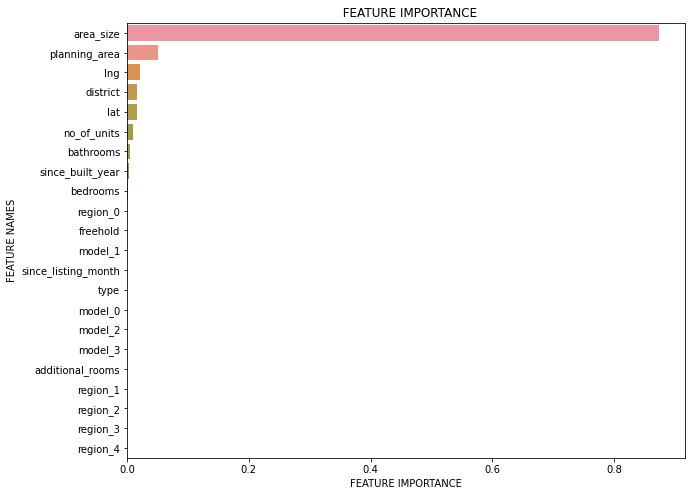

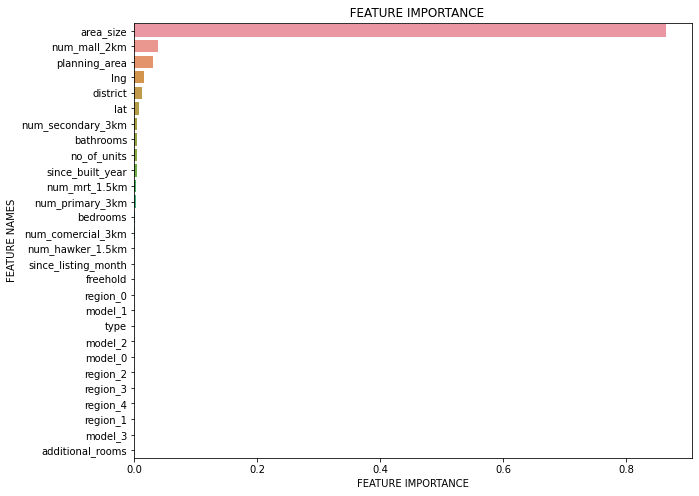

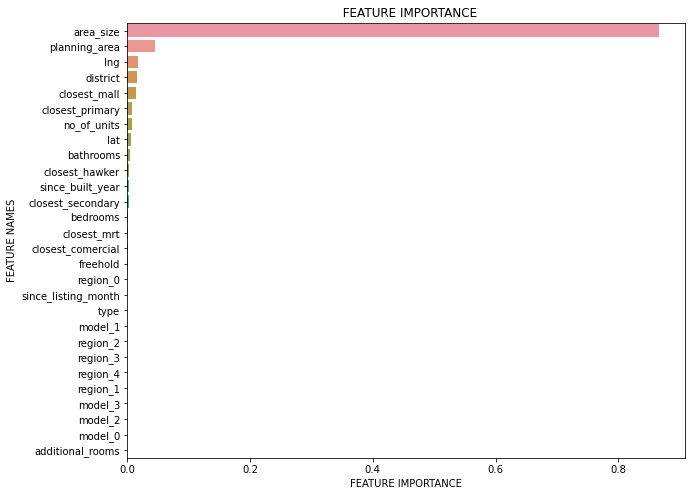

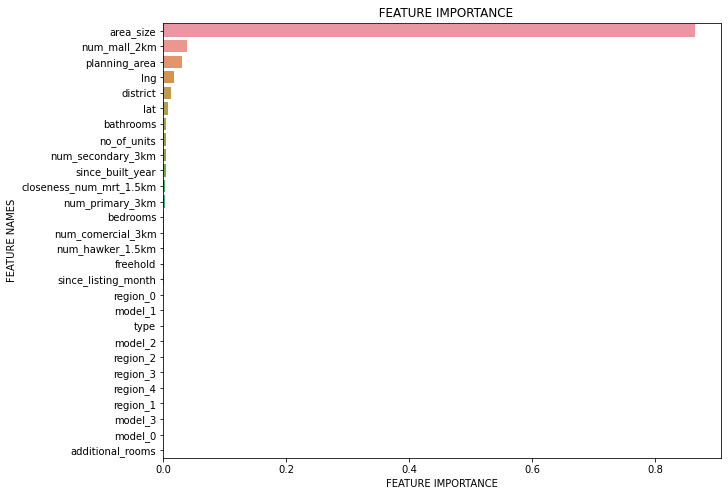

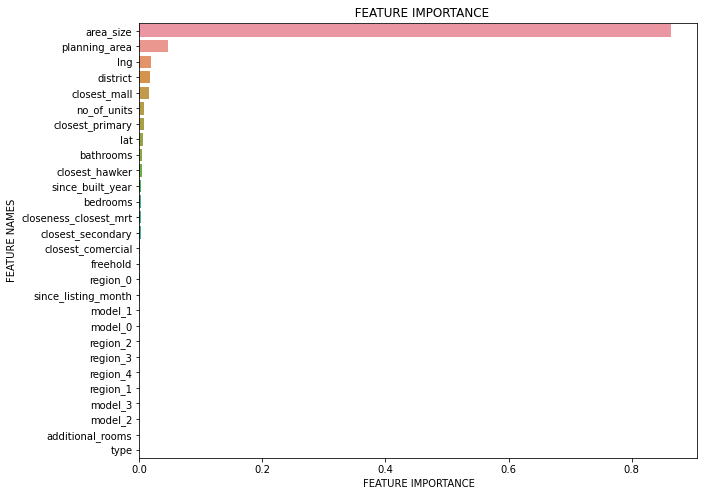

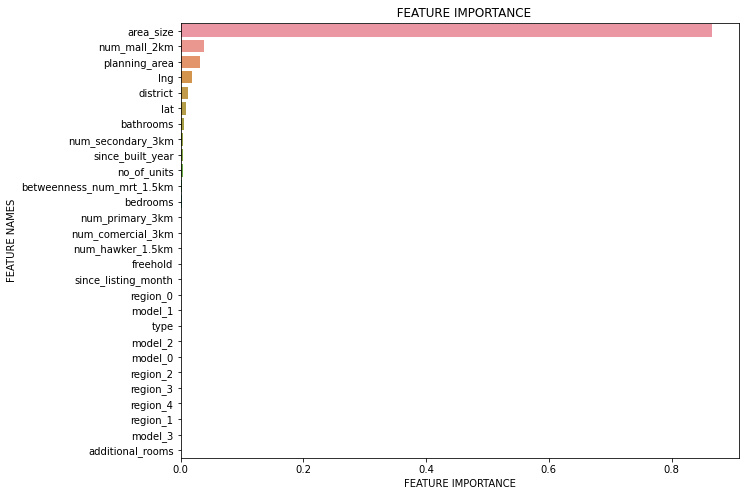

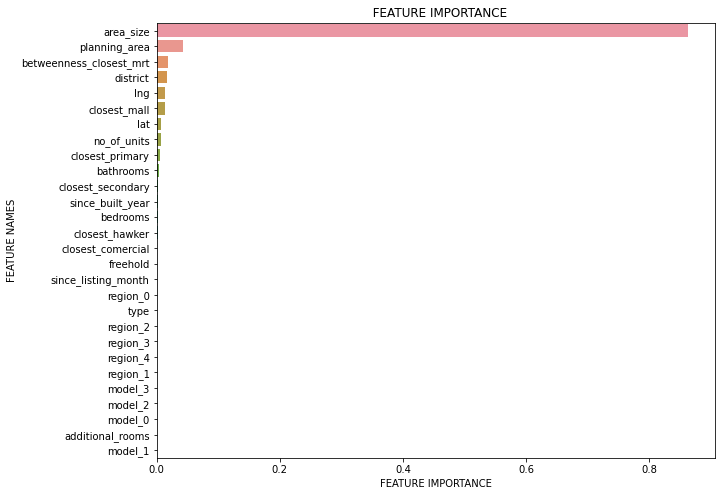

In [99]:
clf = reg = GradientBoostingRegressor(n_estimators=100, random_state=0)
for t_df in tdfs:
    train_regressor(clf, t_df, gb_r2, gb_rmse)
    print('done')

In [100]:
model = ['all_original_data','reduced_w_num_amenties', 
        'reduced_w_closeness_num_amenties','reduced_w_betweenness_num_amenties',
        'reduced_w_nearest_amenties', 'reduced_w_closeness_nearest_amenties', 
        'reduced_w_betweenness_nearest_amenties']

d = {'model': model, 'R2': gb_r2, 'RMSE': gb_rmse}

cv_results = pd.DataFrame(data=d)
cv_results['RMSE']= cv_results['RMSE'] *(-1)

Text(0, 0.5, 'r2')

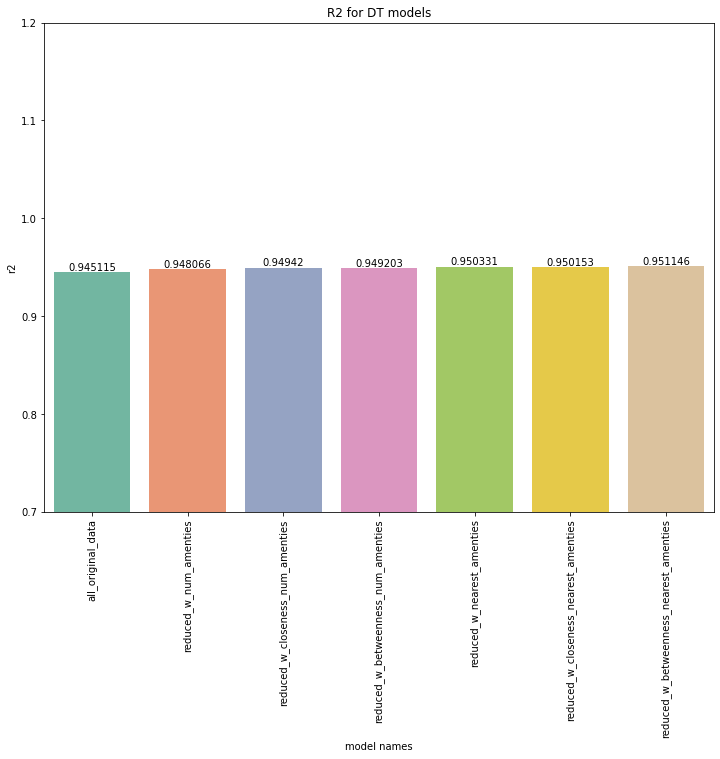

In [101]:
plt.figure(figsize=(12, 9))
ax = sns.barplot(x="model", y="R2", data=cv_results, palette="Set2")
ax.bar_label(ax.containers[0])
plt.ylim(0.7, 1.2)
_ = plt.xticks(rotation=90)
#Add chart labels
plt.title('R2 for DT models')
plt.xlabel('model names')
plt.ylabel('r2')
# plt.savefig('Decison Tree models R2.jpeg')

Text(0, 0.5, 'rmse')

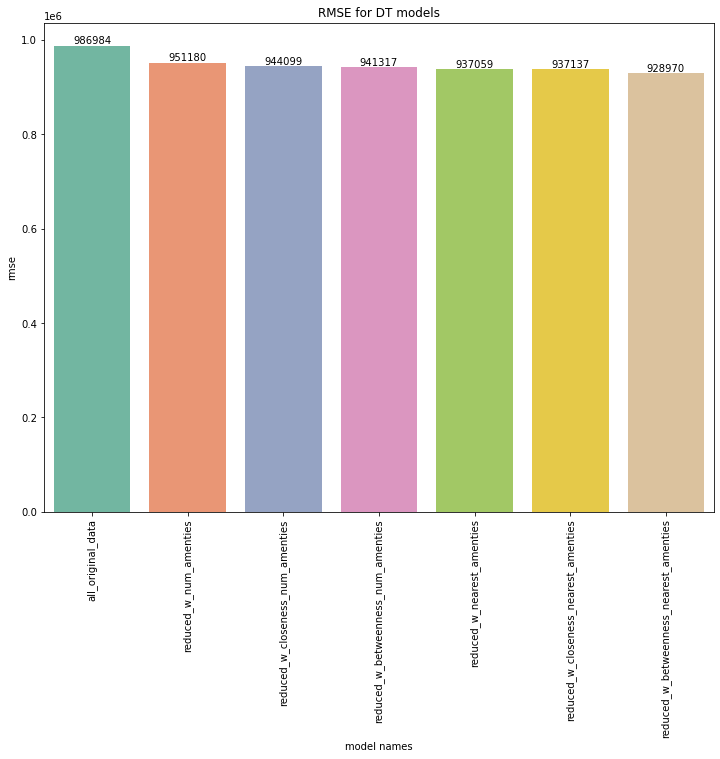

In [102]:
plt.figure(figsize=(12, 9))
ax = sns.barplot(x="model", y="RMSE", data=cv_results, palette="Set2")
ax.bar_label(ax.containers[0])
# plt.ylim(1.0*10**6, 1.2*10**6)
_ = plt.xticks(rotation=90)
#Add chart labels
plt.title('RMSE for DT models')
plt.xlabel('model names')
plt.ylabel('rmse')
# plt.savefig('Decison Tree models RMSE.jpeg')

## Hyper parameter Tuning

In [128]:
param_grid = {
              "n_estimators": [100, 200, 500],
              'min_samples_split': [2, 5, 10], 
              'max_depth': [10, 20, 50, None], 
              'max_features': ['auto', 'log2',  None],
              'learning_rate':[0.1, 0.05, 0.01],
              'subsample': [0.5, 0.8, 1.0]
             }


dt = DecisionTreeRegressor()

adaboost = GradientBoostingRegressor()

# run grid search
model = GridSearchCV(adaboost, param_grid=param_grid, scoring='neg_root_mean_squared_error', 
                     cv = 3,n_jobs = -1, verbose = 2 )

model.fit(x_train_red_distance_betweenness, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200, subsample=0.5; total time=  12.9s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500, subsample=1.0; total time= 1.3min
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=100, subsample=1.0; total time=  15.0s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=500, subsample=0.5; total time=  42.8s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=500, subsample=0.8; total time=  11.7s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200, subsample=0.8; total time=   4.6s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=500, subsample=0.8; total time=  11

[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200, subsample=0.8; total time=  20.8s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100, subsample=0.5; total time=   8.6s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100, subsample=1.0; total time=  14.9s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200, subsample=0.8; total time=  25.0s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500, subsample=0.8; total time= 1.0min
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   2.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, m

[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100, subsample=1.0; total time=  10.7s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500, subsample=0.8; total time= 1.0min
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500, subsample=1.0; total time= 1.3min
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=500, subsample=1.0; total time=  13.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=500, subsample=0.5; total time=   8.5s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   2.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2,

[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100, subsample=1.0; total time=  10.8s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500, subsample=1.0; total time= 1.3min
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=100, subsample=1.0; total time=  14.9s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200, subsample=1.0; total time=  30.2s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, subsample=0.5; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   2.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=200, subsample=0.5; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2,

[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   9.0s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500, subsample=0.8; total time= 1.1min
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500, subsample=1.0; total time= 1.3min
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=500, subsample=0.8; total time=  11.6s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200, subsample=1.0; total time=   5.2s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=500, subsample=1.0; total time=  13.1s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=500, subsample=0.8; total time=  11.4s
[CV] END learning_rate=0.1, max_depth=10, max_features=None, 

[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200, subsample=1.0; total time=  25.7s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100, subsample=0.8; total time=  12.5s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200, subsample=0.8; total time=  25.1s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500, subsample=0.8; total time= 1.0min
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=500, subsample=1.0; total time= 1.3min
[CV] END learning_rate=0.1, max_depth=10, max_features=None, min_samples_split=2, n_estimators=500, subsample=0.8; total time= 1.0min
[CV] END learning_rate=0.1, max_depth=10, max_features=None, min_samples_split=5, n_estimators=500, subsample=1.0; total time= 1.2min
[CV] END learning_rate=0.1, max_depth=20, max_features=auto, 

[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100, subsample=1.0; total time=  10.6s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500, subsample=0.8; total time= 1.0min
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   8.5s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=100, subsample=0.8; total time=  12.5s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200, subsample=0.8; total time=  24.9s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=500, subsample=1.0; total time= 1.3min
[CV] END learning_rate=0.1, max_depth=10, max_features=None, min_samples_split=2, n_estimators=500, subsample=0.5; total time=  42.4s
[CV] END learning_rate=0.1, max_depth=10, max_features=Non

[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100, subsample=0.5; total time=   6.1s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200, subsample=1.0; total time=  28.2s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200, subsample=0.5; total time=  17.1s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500, subsample=0.8; total time= 1.0min
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=500, subsample=0.8; total time= 1.1min
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   5.2s
[CV] END learning_rate=0.1, max_depth=10, max_features=None, min_samples_split=2, n_estimators=100, subsample=0.8; total time=  12.7s
[CV] END learning_rate=0.1, max_depth=10, max_features=None,

[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100, subsample=0.5; total time=   6.1s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200, subsample=1.0; total time=  28.1s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200, subsample=0.5; total time=  17.0s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500, subsample=0.5; total time=  42.1s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200, subsample=0.8; total time=  25.0s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=500, subsample=0.8; total time= 1.1min
[CV] END learning_rate=0.1, max_depth=10, max_features=None, min_samples_split=2, n_estimators=100, subsample=0.5; total time=   8.7s
[CV] END learning_rate=0.1, max_depth=10, max_features=None,

[CV] END learning_rate=0.1, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200, subsample=1.0; total time=  49.8s
[CV] END learning_rate=0.1, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100, subsample=0.8; total time=  26.0s
[CV] END learning_rate=0.1, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100, subsample=1.0; total time=  27.4s
[CV] END learning_rate=0.1, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=200, subsample=0.8; total time=  56.3s
[CV] END learning_rate=0.1, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=500, subsample=0.5; total time= 1.7min
[CV] END learning_rate=0.1, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=200, subsample=1.0; total time= 2.5min
[CV] END learning_rate=0.1, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=100, subsample=0.5; total time=   3.3s
[CV] END learning_rate=0.1, max_depth=None, max

[CV] END learning_rate=0.1, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   3.3s
[CV] END learning_rate=0.1, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   4.5s
[CV] END learning_rate=0.1, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   5.3s
[CV] END learning_rate=0.1, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=200, subsample=0.8; total time=   8.9s
[CV] END learning_rate=0.1, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=500, subsample=0.5; total time=  15.5s
[CV] END learning_rate=0.1, max_depth=None, max_features=None, min_samples_split=2, n_estimators=100, subsample=0.5; total time=  18.9s
[CV] END learning_rate=0.1, max_depth=None, max_features=None, min_samples_split=2, n_estimators=200, subsample=0.5; total time=  41.7s
[CV] END learning_rate=0.1, max_depth=None,

[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=2, n_estimators=100, subsample=0.8; total time=  12.7s
[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=2, n_estimators=200, subsample=1.0; total time=  30.8s
[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=5, n_estimators=100, subsample=0.8; total time=  12.6s
[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=5, n_estimators=100, subsample=1.0; total time=  15.5s
[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=5, n_estimators=200, subsample=0.8; total time=  26.0s
[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=5, n_estimators=500, subsample=1.0; total time= 1.3min
[CV] END learning_rate=0.05, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=100, subsample=0.8; total time=  20.6s
[CV] END learning_rate=0.05, max_depth=20, max_features

[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=5, n_estimators=200, subsample=1.0; total time=  31.1s
[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=10, n_estimators=100, subsample=1.0; total time=  14.9s
[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=10, n_estimators=200, subsample=1.0; total time=  30.0s
[CV] END learning_rate=0.05, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=100, subsample=0.5; total time=  14.0s
[CV] END learning_rate=0.05, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=100, subsample=1.0; total time=  23.9s
[CV] END learning_rate=0.05, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=200, subsample=1.0; total time=  49.1s
[CV] END learning_rate=0.05, max_depth=20, max_featu

[CV] END learning_rate=0.05, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   2.6s
[CV] END learning_rate=0.05, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=200, subsample=0.8; total time=   4.9s
[CV] END learning_rate=0.05, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=500, subsample=0.8; total time=  11.4s
[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=2, n_estimators=100, subsample=1.0; total time=  15.2s
[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=2, n_estimators=500, subsample=0.5; total time=  43.4s
[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=5, n_estimators=200, subsample=0.5; total time=  17.5s
[CV] END learning_rate=0.05, max_depth=10, max_feat

[CV] END learning_rate=0.1, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=200, subsample=0.5; total time=   6.5s
[CV] END learning_rate=0.1, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=500, subsample=0.5; total time=  15.8s
[CV] END learning_rate=0.1, max_depth=None, max_features=None, min_samples_split=2, n_estimators=100, subsample=0.5; total time=  19.9s
[CV] END learning_rate=0.1, max_depth=None, max_features=None, min_samples_split=2, n_estimators=100, subsample=1.0; total time=  25.3s
[CV] END learning_rate=0.1, max_depth=None, max_features=None, min_samples_split=2, n_estimators=500, subsample=0.5; total time= 1.8min
[CV] END learning_rate=0.1, max_depth=None, max_features=None, min_samples_split=5, n_estimators=200, subsample=0.8; total time=  55.9s
[CV] END learning_rate=0.1, max_depth=None, max_features=None, min_samples_split=5, n_estimators=500, subsample=0.8; total time= 2.6min
[CV] END learning_rate=0.1, max_depth=None, ma

[CV] END learning_rate=0.05, max_depth=20, max_features=log2, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=20, max_features=log2, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   3.6s
[CV] END learning_rate=0.05, max_depth=20, max_features=log2, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   4.1s
[CV] END learning_rate=0.05, max_depth=20, max_features=log2, min_samples_split=10, n_estimators=200, subsample=0.5; total time=   5.6s
[CV] END learning_rate=0.05, max_depth=20, max_features=log2, min_samples_split=10, n_estimators=500, subsample=0.5; total time=  14.0s
[CV] END learning_rate=0.05, max_depth=20, max_features=None, min_samples_split=2, n_estimators=100, subsample=0.8; total time=  21.0s
[CV] END learning_rate=0.05, max_depth=20, max_features=None, min_samples_split=2, n_estimators=500, subsample=0.5; total time= 1.3min
[CV] END learning_rate=0.05, max_depth=20, max_fea

[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=2, n_estimators=500, subsample=1.0; total time= 1.3min
[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=10, n_estimators=100, subsample=0.8; total time=  12.8s
[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=10, n_estimators=200, subsample=0.5; total time=  17.3s
[CV] END learning_rate=0.05, max_depth=10, max_features=None, min_samples_split=10, n_estimators=500, subsample=0.5; total time=  43.2s
[CV] END learning_rate=0.05, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=200, subsample=0.8; total time=  44.5s
[CV] END learning_rate=0.05, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=500, subsample=1.0; total time= 2.2min
[CV] END learning_rate=0.05, max_depth=20, max_features=auto, min_samples_split=10, n_estimators=200, subsample=0.8; total time=  43.3s
[CV] END learning_rate=0.05, max_depth=20, max_feat

[CV] END learning_rate=0.01, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500, subsample=0.5; total time=  43.9s
[CV] END learning_rate=0.01, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200, subsample=0.5; total time=  17.6s
[CV] END learning_rate=0.01, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200, subsample=1.0; total time=  30.7s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, subsample=0.5; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=200, subsample=0.5; total time=   3.8s
[CV] END learning_rate=0.01, max_depth=10, max_featur

[CV] END learning_rate=0.05, max_depth=50, max_features=None, min_samples_split=2, n_estimators=200, subsample=0.8; total time=  52.4s
[CV] END learning_rate=0.05, max_depth=50, max_features=None, min_samples_split=2, n_estimators=500, subsample=1.0; total time= 2.1min
[CV] END learning_rate=0.05, max_depth=50, max_features=None, min_samples_split=10, n_estimators=100, subsample=0.8; total time=  20.3s
[CV] END learning_rate=0.05, max_depth=50, max_features=None, min_samples_split=10, n_estimators=200, subsample=0.8; total time=  52.8s
[CV] END learning_rate=0.05, max_depth=50, max_features=None, min_samples_split=10, n_estimators=500, subsample=0.8; total time= 2.4min
[CV] END learning_rate=0.05, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500, subsample=0.5; total time= 1.7min
[CV] END learning_rate=0.05, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=200, subsample=1.0; total time=  54.1s
[CV] END learning_rate=0.05, max_depth=None, max

[CV] END learning_rate=0.05, max_depth=None, max_features=None, min_samples_split=2, n_estimators=200, subsample=0.8; total time=  53.6s
[CV] END learning_rate=0.05, max_depth=None, max_features=None, min_samples_split=5, n_estimators=100, subsample=0.5; total time=  15.4s
[CV] END learning_rate=0.05, max_depth=None, max_features=None, min_samples_split=5, n_estimators=100, subsample=0.8; total time=  22.3s
[CV] END learning_rate=0.05, max_depth=None, max_features=None, min_samples_split=5, n_estimators=200, subsample=0.5; total time=  41.8s
[CV] END learning_rate=0.05, max_depth=None, max_features=None, min_samples_split=5, n_estimators=200, subsample=1.0; total time=  54.9s
[CV] END learning_rate=0.05, max_depth=None, max_features=None, min_samples_split=10, n_estimators=100, subsample=0.5; total time=  14.4s
[CV] END learning_rate=0.05, max_depth=None, max_features=None, min_samples_split=10, n_estimators=100, subsample=1.0; total time=  24.9s
[CV] END learning_rate=0.05, max_depth=

[CV] END learning_rate=0.01, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200, subsample=1.0; total time=  49.3s
[CV] END learning_rate=0.01, max_depth=20, max_features=auto, min_samples_split=10, n_estimators=100, subsample=0.8; total time=  19.5s
[CV] END learning_rate=0.01, max_depth=20, max_features=auto, min_samples_split=10, n_estimators=100, subsample=1.0; total time=  24.1s
[CV] END learning_rate=0.01, max_depth=20, max_features=auto, min_samples_split=10, n_estimators=500, subsample=0.5; total time= 1.2min
[CV] END learning_rate=0.01, max_depth=20, max_features=log2, min_samples_split=2, n_estimators=500, subsample=0.5; total time=  16.7s
[CV] END learning_rate=0.01, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   3.9s
[CV] END learning_rate=0.01, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   4.6s
[CV] END learning_rate=0.01, max_depth=20, max_featu

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [10, 20, 50, None],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.5, 0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=2)

[CV] END learning_rate=0.01, max_depth=20, max_features=None, min_samples_split=2, n_estimators=500, subsample=0.5; total time= 1.2min
[CV] END learning_rate=0.01, max_depth=20, max_features=None, min_samples_split=5, n_estimators=500, subsample=0.5; total time= 1.2min
[CV] END learning_rate=0.01, max_depth=20, max_features=None, min_samples_split=10, n_estimators=200, subsample=0.8; total time=  37.1s
[CV] END learning_rate=0.01, max_depth=20, max_features=None, min_samples_split=10, n_estimators=500, subsample=0.8; total time= 1.6min
[CV] END learning_rate=0.01, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=500, subsample=1.0; total time= 2.1min
[CV] END learning_rate=0.01, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=200, subsample=0.5; total time=  24.9s
[CV] END learning_rate=0.01, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=500, subsample=0.5; total time= 1.2min
[CV] END learning_rate=0.01, max_depth=50, max_feat

[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=500, subsample=1.0; total time=  13.1s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200, subsample=0.8; total time=   4.7s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=500, subsample=0.5; total time=   9.0s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=200, subsample=0.8; total time=   4.8s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=500, subsample=0.8; total time=  12.4s
[CV] END learning_rate=0.01, max_depth=10, max_feat

[CV] END learning_rate=0.01, max_depth=None, max_features=None, min_samples_split=10, n_estimators=200, subsample=0.5; total time=  25.1s
[CV] END learning_rate=0.01, max_depth=None, max_features=None, min_samples_split=10, n_estimators=500, subsample=0.5; total time= 1.0min
[CV] END learning_rate=0.01, max_depth=None, max_features=None, min_samples_split=5, n_estimators=500, subsample=1.0; total time= 2.1min
[CV] END learning_rate=0.01, max_depth=10, max_features=None, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END learning_rate=0.01, max_depth=10, max_features=None, min_samples_split=10, n_estimators=100, subsample=1.0; total time=  15.2s
[CV] END learning_rate=0.01, max_depth=10, max_features=None, min_samples_split=10, n_estimators=200, subsample=1.0; total time=  30.4s
[CV] END learning_rate=0.01, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=100, subsample=0.5; total time=  13.7s
[CV] END learning_rate=0.01, max_depth=20, m

[CV] END learning_rate=0.01, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100, subsample=1.0; total time=  15.8s
[CV] END learning_rate=0.01, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200, subsample=0.8; total time=  25.7s
[CV] END learning_rate=0.01, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500, subsample=1.0; total time= 1.3min
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, subsample=0.5; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=200, subsample=0.5; total time=   3.8s
[CV] END learning_rate=0.01, max_depth=10, max_features

[CV] END learning_rate=0.01, max_depth=None, max_features=None, min_samples_split=10, n_estimators=200, subsample=0.5; total time=  25.0s
[CV] END learning_rate=0.01, max_depth=None, max_features=None, min_samples_split=10, n_estimators=500, subsample=0.8; total time= 1.3min
[CV] END learning_rate=0.01, max_depth=50, max_features=None, min_samples_split=10, n_estimators=200, subsample=0.5; total time=  25.0s
[CV] END learning_rate=0.01, max_depth=50, max_features=None, min_samples_split=10, n_estimators=500, subsample=0.8; total time= 1.7min
[CV] END learning_rate=0.01, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500, subsample=0.8; total time= 1.8min
[CV] END learning_rate=0.01, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=500, subsample=1.0; total time= 2.1min
[CV] END learning_rate=0.01, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500, subsample=0.8; total time=  24.9s
[CV] END learning_rate=0.01, max_depth=No